# Homework1: 
Author: Jeremy Chen
Date: April 10th, 2024
Class: ASTR 427

## Problem 1: Floating point representation

(a). The smallest $\epsilon$ such that $1.0 - \epsilon \ne 1.0$.
(b). The smallest $\epsilon$ such that $1.0 + \epsilon \ne 1.0$.
(c). The maximum representable number.
(d).  The minimum representable positive number. 

In [1]:
import sys
# Problem 1
# return the samllest eps such that 1.0 - eps is not 1.0
def find_epsilon_1(): # 1- eps 
    epsilon = 1.0
    while 1.0 - epsilon != 1.0:
        epsilon /= 2
    return epsilon * 2

# return the smallest eps such that 1.0 +eps is not 1.0
def find_epsilon_2(): # 1 + eps 
    epsilon = 1.0
    while 1.0 + epsilon != 1.0:
        epsilon /= 2
    return epsilon * 2

# Find the maximum representable number 
def find_max_number(): 
    max_number = 1.0
    while max_number * 2 != float('inf'):
        max_number *= 2
    return max_number

# Find mimium representable positive number 
def find_min_positive_number():
    min_positive = 1.0
    while min_positive / 2 > 0:
        min_positive /= 2
    return min_positive

epsilon1 = find_epsilon_1()
epsilon2 = find_epsilon_2()
max_number = find_max_number()
min_positive_number = find_min_positive_number()

print(f"The smallest ε such that 1.0 - ε != 1.0: {epsilon1}")
print(f"The smallest ε such that 1.0 + ε != 1.0: {epsilon2}")
print(f"The maximum representable number: {max_number}")
print(f"The minimum representable positive number: {min_positive_number}")


The smallest ε such that 1.0 - ε != 1.0: 1.1102230246251565e-16
The smallest ε such that 1.0 + ε != 1.0: 2.220446049250313e-16
The maximum representable number: 8.98846567431158e+307
The minimum representable positive number: 5e-324


The number is based on IEEE 754 representation because it is too small or too big to be represented in a normal way, it is more concise to write in this way to repsent the places. 

TRQ: 1.a and b) Be aware of rounding: this allows the numbers to be a
factor of ~2 smaller than what you would naively intuit from the
format.  (5.6e-17 and 1.2e-16).

TRQ: 1.c: Recall that you can fill out the bits in the mantissa to make the
largest number about a factor of 2 greater than 2**2023


TRQ: I expected some quantitative reasoning about the size of the numbers.

## Problem 2: Roundoff error
Numberically evaluate the expression $ (1-\cos (x)) / x^2$ in double precision for values of x around $10^{-7}$ and smaller. Explain the difference between the numerical results and the analytic limit as $ x \rightarrow 0$.

In [2]:
import numpy as np
import pylab as pylab
import matplotlib.pyplot as plt

In [3]:
# take an array x and return an array of corresponding f(x) values 
def f (x):
    result = []
    for i in range(len(x)):
        result.append((1- np.cos(x[i]))/ x[i]**2)
    return result

In [4]:
# create an array with size 10e5 evenly spacing between 1 and 1e-7
x = np.linspace(0, 1e-7, 10**5)
x = x[1::]
result = f(x)
result = np.array(result)

In [5]:
print(result[result > 0])

[0.99992536 0.9997356  0.99954588 ... 0.49962035 0.49961035 0.49960036]


In [6]:
def first_nonzero(array):
    for i in range(len(array) - 1):
        if array[i] > 0:
            return i 

In [7]:
resolution = (1e-7) / 10**6
print("samllest x value for the expression is nonzero:", first_nonzero(result) * resolution)

samllest x value for the expression is nonzero: 1.0536e-09


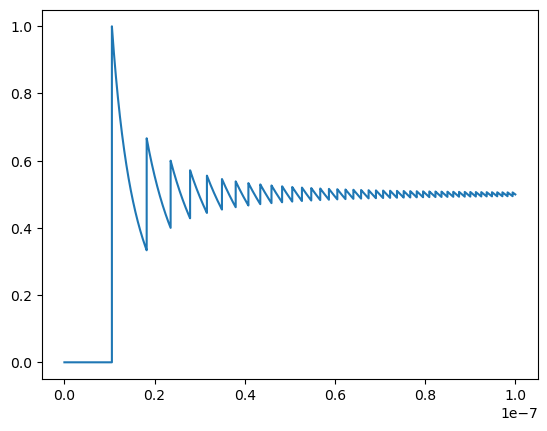

In [8]:
plt.plot(x, result)

Conclusion: Numerical results: $\lim _{x \rightarrow 0} (1-\cos(x))/x^2) \rightarrow 1$
            Analytical solution: $\lim _{x \rightarrow 0} (1-\cos(x))/x^2) \rightarrow 1/2$
            
The difference is that when uw analytically analysis the problem, we can use L'Hospital's rules, and evaluate to 1/2, but the computer have a issues of values ocillaction when approach a limit, thus, we see an oscillation bigger and bigger as shown above. 

TRQ: The origin of the oscillation is roundoff in the expression $1 - \cos(x)$

## 3. Interpolation

(a) Write a program to read in a two column table from a file and per-
form linear interpolation at an arbitrary point. You may assume
that the data is evenly spaced in the independent variable (this
makes it easier to determine which points to use for interpolation).

(b) Use the program on the following input data: (available on the
canvas site as hw data.txt)
x y
1 100
2 25
3 11.111111
4 6.25
5 4
and provide an estimate of y at x = 4.75.

(c) Either using your own routine or a package (e.g. scipy.interpolate)
calculate interpolated values of y at 100 equally spaced points be-
tween x = 1 and x = 5 using the above data with linear, quadratic,
and 4th order polynomials, and plot the interpolated y vs. x.

(Note: we are NOT performing a “fit” here; we want polynomi-
als that go exactly through all the given data points.) Give an
estimate of y at x = 4.75 for each of these polynomial orders.

(d) The actual function tabulated above is y =
100
x2 . Compare the
actual value at x = 4.75 with the linear interpolation and the 4th
order polynomial interpolation, and comment on why one is more
accurate than the other.

In [10]:
# Initialize empty lists for x and y values
x = []
y = []

# Open the file and read its content
# TRQ: the numpy.loadtxt() method can do the following in one line

with open('hw1_data.txt', 'r') as file:
    next(file)  # Skip the first line with headers
    for line in file:
        # Split the line into parts based on whitespace
        parts = line.strip().split()
        
        # Convert the parts to the appropriate types and append to lists
        x.append(int(parts[0]))  # Convert the first part (x value) to int
        y.append(float(parts[1]))  # Convert the second part (y value) to float

# Now x and y are filled with the respective values from the file
print("x values:", x)
print("y values:", y)


x values: [1, 2, 3, 4, 5]
y values: [100.0, 25.0, 11.111111, 6.25, 4.0]


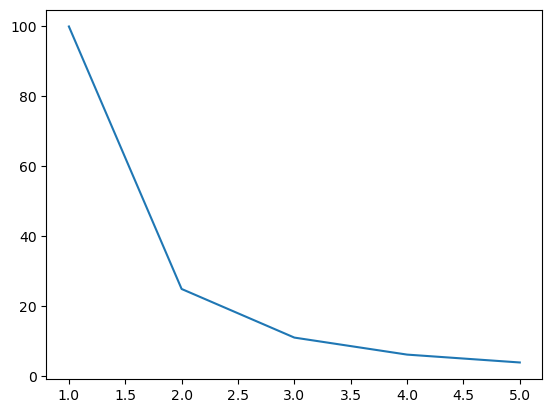

In [11]:
plt.plot(x,y)

In [14]:
def linear_interpolation(x1, y1, x2, y2, x):
    """Performs linear interpolation to estimate the y value at a given x."""
    return y1 + ((y2 - y1) / (x2 - x1)) * (x - x1)

# Given data
# TRQ: you have hard coded the data instead of using the above function to read from a file

x_values = [1, 2, 3, 4, 5]
y_values = [100.0, 25.0, 11.111111, 6.25, 4.0]

# Estimate y at x = 4.75 using points (4, 6.25) and (5, 4.0)
y_estimated = linear_interpolation(4, 6.25, 5, 4.0, 4.75)
print(f"Estimated y at x = 4.75 (Linear Interpolation): {y_estimated}")


Estimated y at x = 4.75 (Linear Interpolation): 4.5625


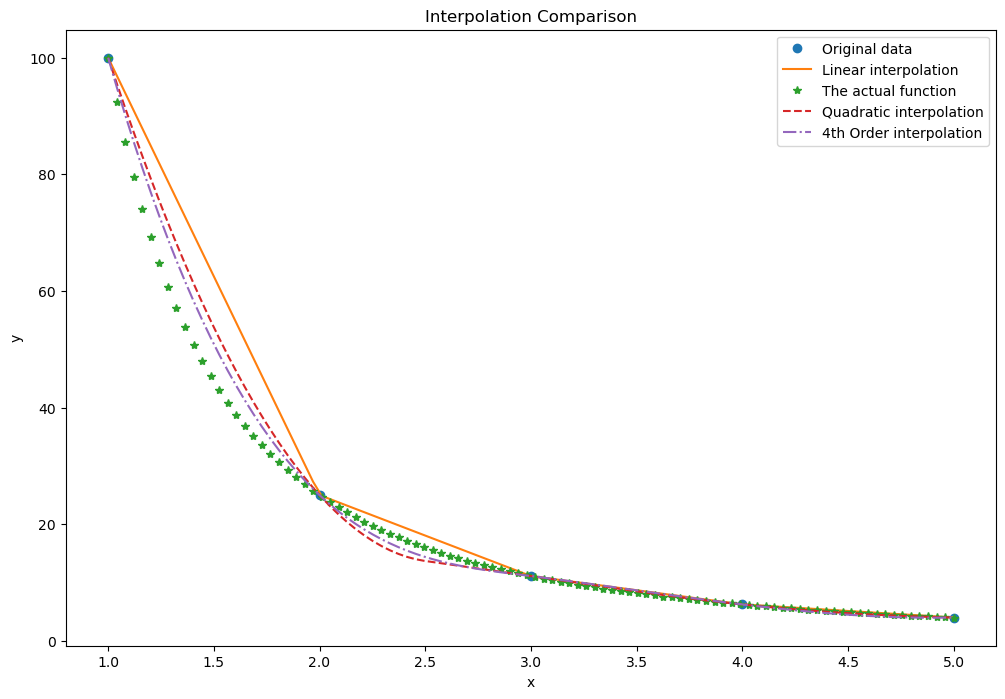

In [17]:
import numpy as np
import scipy as scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Given data
x_values = np.array([1, 2, 3, 4, 5])
y_values = np.array([100.0, 25.0, 11.111111, 6.25, 4.0])

# Interpolation points
x_interp_points = np.linspace(1, 5, 100)

# Interpolations
linear_interp = interp1d(x_values, y_values, kind='linear')
quadratic_interp = interp1d(x_values, y_values, kind='quadratic')
fourth_order_interp = interp1d(x_values, y_values, kind='cubic')  # Using cubic as an approximation for 4th order
# TRQ: I did ask for 4th order.

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, 'o', label='Original data')
plt.plot(x_interp_points, linear_interp(x_interp_points), '-', label='Linear interpolation')
plt.plot(x_interp_points, 100.0 / (x_interp_points **2), '*', label = 'The actual function')
plt.plot(x_interp_points, quadratic_interp(x_interp_points), '--', label='Quadratic interpolation')
plt.plot(x_interp_points, fourth_order_interp(x_interp_points), '-.', label='4th Order interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Comparison')
plt.show()


In [18]:
# Calculate the actual y value at x = 4.75
y_actual = 100 / (4.75**2)

# Interpolated estimates at x = 4.75
y_linear_475 = linear_interp(4.75)
y_fourth_order_475 = fourth_order_interp(4.75)

# Differences
diff_linear = abs(y_actual - y_linear_475)
diff_fourth_order = abs(y_actual - y_fourth_order_475)

print(f"Actual y at x = 4.75: {y_actual}")
print(f"Linear Interpolation difference: {diff_linear}")
print(f"4th Order Interpolation difference: {diff_fourth_order}")

# This code assumes the interpolations (linear_interp and fourth_order_interp) have been defined as in part (c)


Actual y at x = 4.75: 4.43213296398892
Linear Interpolation difference: 0.13036703601108002
4th Order Interpolation difference: 0.38786209289516993


Higher-order polynomials have more degrees of freedom and can capture more complex data patterns. However, they can also exhibit Runge's phenomenon, where oscillations occur at the edges of the data set, leading to inaccuracies, especially when extrapolating or interpolating near the dataset's boundaries.